In [1]:
import random
import pandas as pd
import numpy as np
from model_utils import *
import torch.nn as nn
import torch.optim as optim
from optimizer import Optimizer


def generate_rand_dataset(seed,nsamples,timesteps):
    np.random.seed(seed)
    j = [(a, b) for a in range(0,nsamples,1) for b in random.sample(pd.date_range('2018-01-01', periods=timesteps, freq='D').tolist(), timesteps)]
    j.sort()
    i = pd.MultiIndex.from_tuples(j, names=['Name','Date'])
    df = pd.DataFrame({'x':np.random.randint(0,100,nsamples*timesteps),
                       'y':np.random.randint(0,100,nsamples*timesteps),
                      'z':np.random.randint(0,100,nsamples*timesteps)}, i)
    y=np.random.randint(0,2,nsamples)
    return(df,y)

batch_size = 32
nsamples=256
timesteps=10
train_x,train_y=generate_rand_dataset(456,nsamples,timesteps)
train_dataset = pandas_to_dataset(train_x,train_y)
train_loader = train_dataset.to_loader(batch_size)
val_x,val_y=generate_rand_dataset(456,nsamples,timesteps)
val_dataset = pandas_to_dataset(val_x,val_y)
val_loader = train_dataset.to_loader(batch_size)

In [2]:
input_dim = 3
output_dim = 1
hidden_dim = 32
layer_dim = 1
dropout = 0.2
n_epochs = 100
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('lstm', model_params)

/Users/valli/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/100] Training loss: 0.7802	 Validation loss: 0.7621
[2/100] Training loss: 0.7480	 Validation loss: 0.7290
[3/100] Training loss: 0.7143	 Validation loss: 0.6944
[4/100] Training loss: 0.6822	 Validation loss: 0.6652
[5/100] Training loss: 0.6544	 Validation loss: 0.6390
[6/100] Training loss: 0.6271	 Validation loss: 0.6116
[7/100] Training loss: 0.5993	 Validation loss: 0.5838
[8/100] Training loss: 0.5705	 Validation loss: 0.5536
[9/100] Training loss: 0.5431	 Validation loss: 0.5309
[10/100] Training loss: 0.5253	 Validation loss: 0.5197
[50/100] Training loss: 0.4965	 Validation loss: 0.4965
[100/100] Training loss: 0.4960	 Validation loss: 0.4960


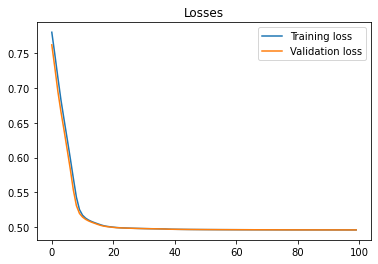

In [3]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

opt = Optimizer(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()